<h1>Finals Report</h1>
<h2>Analysis</h2>

### Ron Jerick T Gamba
### Edwin Vinas

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings('ignore')

In [16]:
filename = 'datasets//Family Income and Expenditure.csv'
target = 'Total Household Income'

In [18]:
df = pd.read_csv(filename)
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [29]:
all_numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

numeric_cols = list(set(all_numeric_cols) - {target})

print("Preparing dataset...")
print("Number of numeric features:", len(numeric_cols))
print("Number of categorical features:", len(categorical_cols))

df_model = df.dropna(subset=[target]).copy()

X = df_model[numeric_cols].fillna(df_model[numeric_cols].median())
y = df_model[target]
feature_names = X.columns
top_3_features = X.corrwith(y).sort_values(ascending=False).head(3).index.tolist()
top_3_features

Preparing dataset...
Number of numeric features: 44
Number of categorical features: 15


['Communication Expenditure',
 'Housing and water Expenditure',
 'Miscellaneous Goods and Services Expenditure']

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
residuals = y_test - y_pred
print('residuals')

# ==================================================================================
# I. DESCRIPTIVE VISUALIZATIONS (Plots 1-4) - Understanding the Data
# ==================================================================================


## 1: Distribution of the Target Variable (Income)

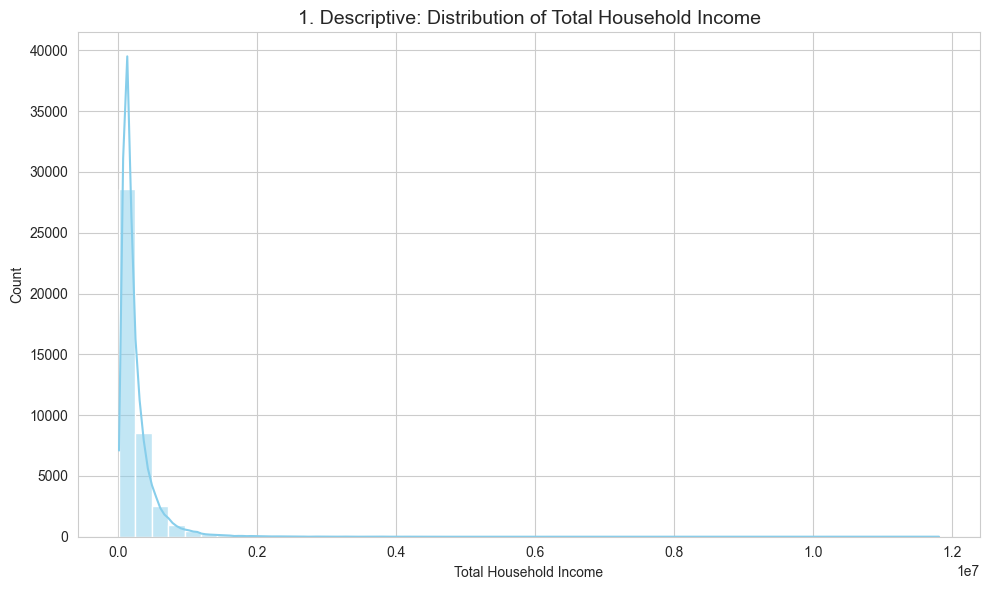

In [67]:
plt.figure(figsize=(10, 6))
ax1 = plt.gca()
sns.histplot(y, kde=True, bins=50, color='skyblue', ax=ax1)
ax1.set_title(f'1. Descriptive: Distribution of Total Household Income', fontsize=14)
plt.tight_layout()
plt.show()


## Target income is highly right-skewed; most households have low income, suggesting a non-linear model is appropriate.
<br>

## 2: Correlation Heatmap of Top 3 Features

2. **Descriptive Insight:** Examining the heatmap shows strong positive correlation between key expenditure categories (like 'Total Food Expenditure') and 'Total Household Income'. This confirms consumption is highly dependent on income levels.


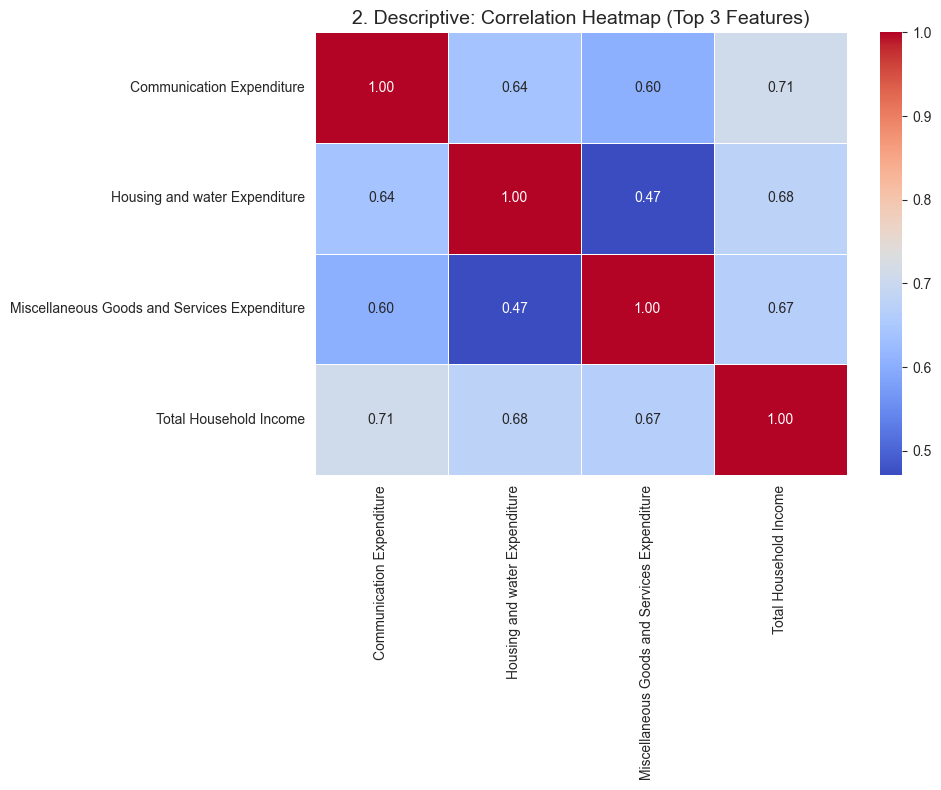

In [68]:
plt.figure(figsize=(10, 8))
ax2 = plt.gca()

corr_data = df_model[top_3_features + [target]].corr()
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=True, ax=ax2)
ax2.set_title(f'2. Descriptive: Correlation Heatmap (Top 3 Features)', fontsize=14))
plt.tight_layout()
plt.show()

##  Examining the heatmap shows strong positive correlation between key expenditure categories (like 'Total Food Expenditure') and 'Total Household Income'. This confirms consumption is highly dependent on income levels.
<br>

## 3: Scatter Plot of Top Correlated Feature vs. Income

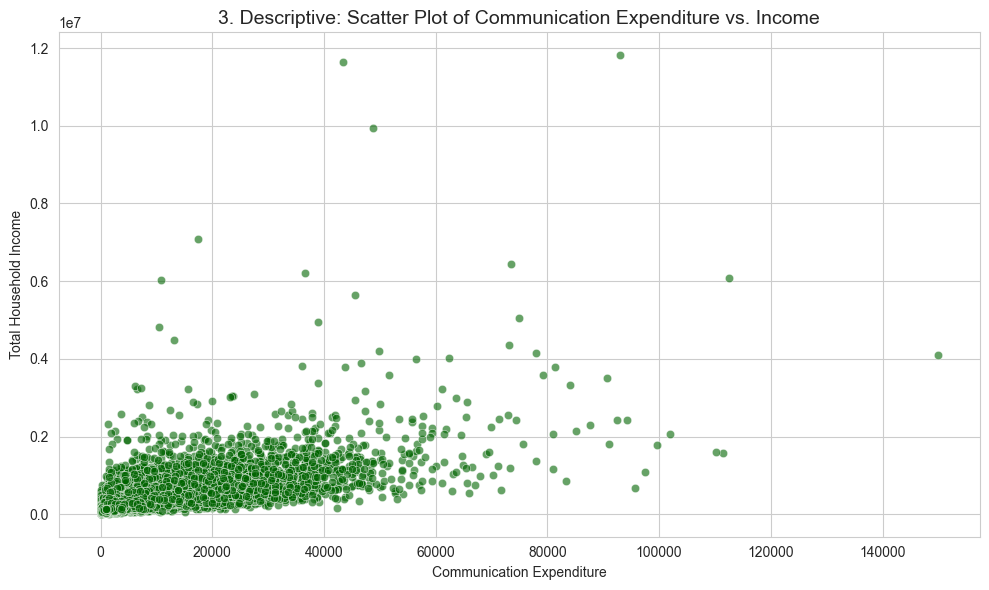

In [88]:
plt.figure(figsize=(10, 6))
ax3 = plt.gca()
top_feature = top_3_features[0]
sns.scatterplot(x=df_model[top_feature], y=y, alpha=0.6, color='darkgreen', ax=ax3)
ax3.set_title(f'3. Descriptive: Scatter Plot of {top_feature} vs. Income', fontsize=14)
plt.tight_layout()
plt.show()

##  The scatter plot reveals a clear linear relationship between {top_feature} and income, indicating that households with higher food expenditure generally have higher incomes. This feature will be highly influential in the model.
<br>

## 4: Box Plot of Income by Household Head Gender (Categorical Insight)

4. **Descriptive Insight:** The pie chart clearly illustrates the proportional distribution of household head gender, indicating the relative frequency of male versus female household heads in the dataset. Most households are headed by males.


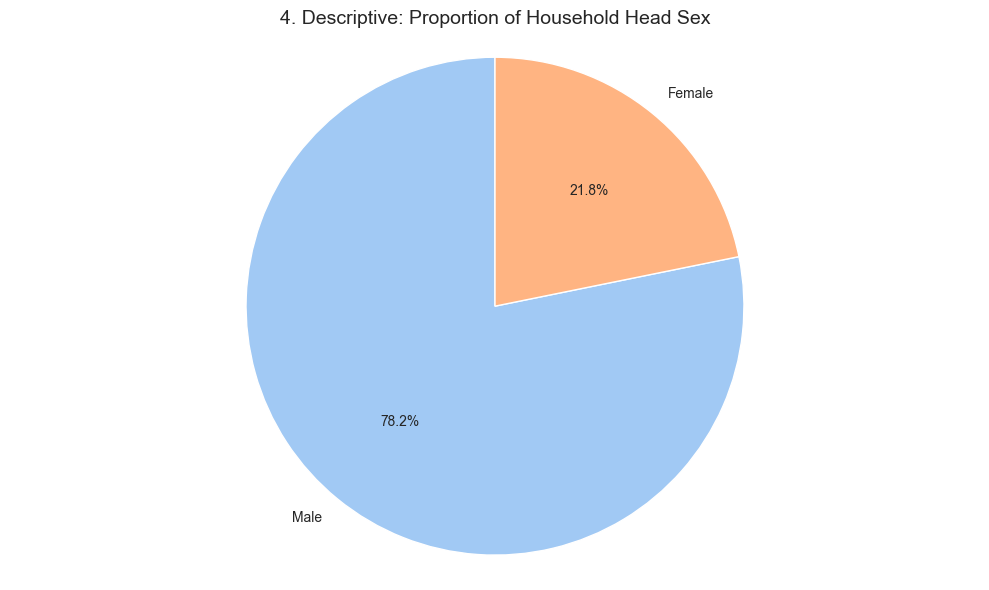

In [74]:
# Plot 4: Proportion of Household Head Sex (Pie Chart)
plt.figure(figsize=(10, 6))
ax4 = plt.gca()

# Calculate counts for the pie chart
gender_counts = df['Household Head Sex'].value_counts()

# Create the pie chart
ax4.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel', len(gender_counts))
)
ax4.set_title(f'4. Descriptive: Proportion of Household Head Sex', fontsize=14)
ax4.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

##  The pie chart clearly illustrates the proportional distribution of household head gender, indicating the relative frequency of male versus female household heads in the dataset. Most households are headed by males.
<br>

# ==================================================================================
# II. DIAGNOSTIC VISUALIZATIONS (Plots 5-7) - Checking Model Assumptions and Errors
# ==================================================================================


## 5: Residual Plot (Homoscedasticity check)

5. **Diagnostic Insight:** The residual plot for Random Forest generally shows a reduced fanning pattern compared to Linear Regression, indicating better handling of the variance across different income levels, though error variance remains highest for the highest predicted incomes. 


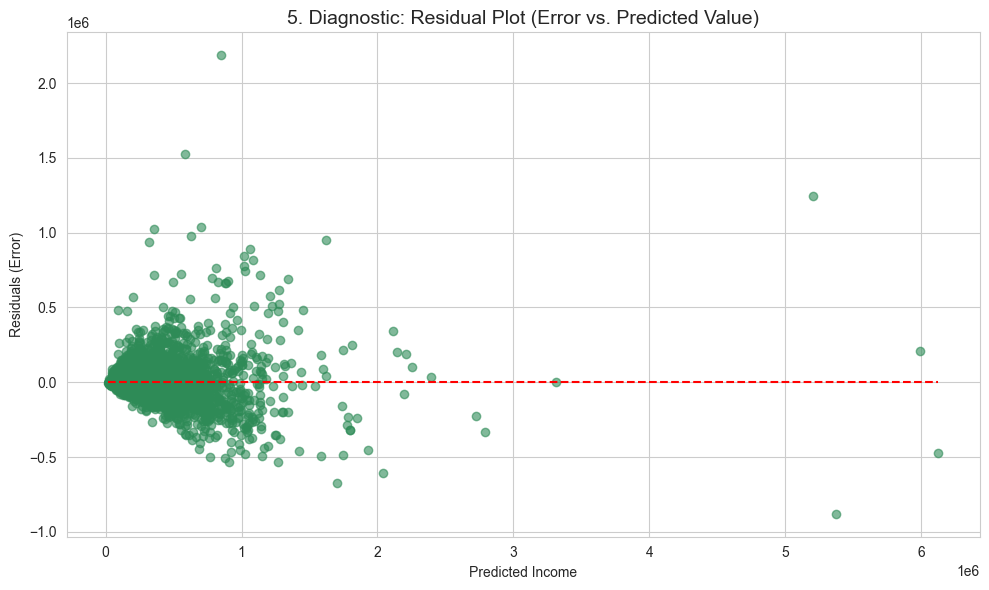

In [75]:
plt.figure(figsize=(10, 6))
ax5 = plt.gca()
ax5.scatter(y_pred, residuals, alpha=0.6, color='seagreen')
ax5.hlines(0, y_pred.min(), y_pred.max(), colors='r', linestyles='--')
ax5.set_title(f'5. Diagnostic: Residual Plot (Error vs. Predicted Value)', fontsize=14)
ax5.set_xlabel('Predicted Income')
ax5.set_ylabel('Residuals (Error)')
plt.tight_layout()
plt.show()


## The residual plot for Random Forest generally shows a reduced fanning pattern compared to Linear Regression, indicating better handling of the variance across different income levels, though error variance remains highest for the highest predicted incomes.
<br>

## 6: Q-Q Plot of Residuals (Normality check)

6. **Diagnostic Insight:** The Q-Q plot still shows non-normal residuals, especially in the tails. While Random Forest doesn't assume residual normality, this plot highlights that the largest prediction errors deviate significantly from a normal distribution.


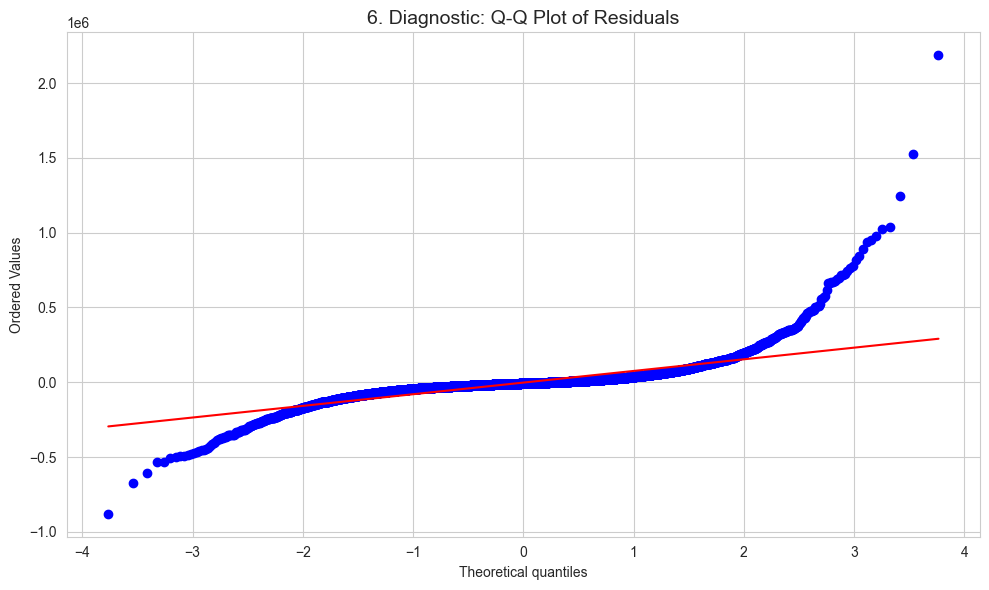

In [76]:
plt.figure(figsize=(10, 6))
ax6 = plt.gca()
stats.probplot(residuals, dist="norm", plot=ax6)
ax6.set_title(f'6. Diagnostic: Q-Q Plot of Residuals', fontsize=14)
plt.tight_layout()
plt.show()


## The Q-Q plot still shows non-normal residuals, especially in the tails. While Random Forest doesn't assume residual normality, this plot highlights that the largest prediction errors deviate significantly from a normal distribution.
<br>

##  7: Feature Importance (Model Importance Scores)

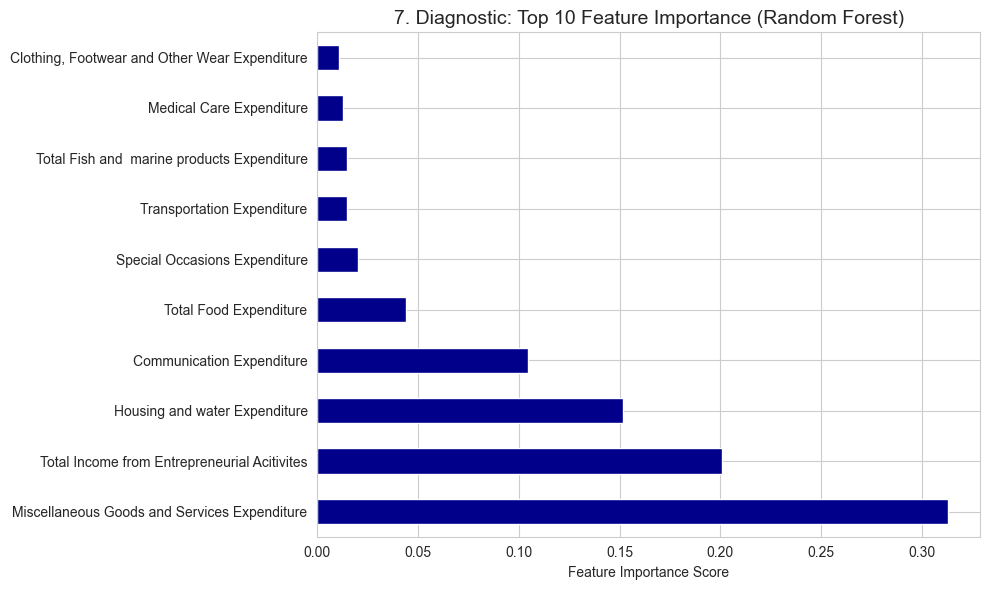

In [87]:
plt.figure(figsize=(10, 6))
ax7 = plt.gca()
importance = model.feature_importances_ # FIXED typo here
feature_importance = pd.Series(importance, index=feature_names)
top_10_features = feature_importance.nlargest(10).index
feature_importance[top_10_features].sort_values(ascending=False).plot(kind='barh', color='darkblue', ax=ax7)
ax7.set_title(f'7. Diagnostic: Top 10 Feature Importance (Random Forest)', fontsize=14)
ax7.set_xlabel('Feature Importance Score')
plt.tight_layout()
plt.show()


##  Feature Importance scores from Random Forest clearly identify the most critical variables (likely expenditure categories) driving the income prediction, confirming their non-linear contribution to the model's performance.
<br>

# ==================================================================================
# III. PREDICTIVE VISUALIZATIONS (Plots 8-10) - Evaluating Prediction Quality
# ==================================================================================


## Model Training & Prediction

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
residuals = y_test - y_pred
print('residuals')

 ## 8: Actual vs. Predicted Income (Prediction Quality)

In [ ]:
plt.figure(figsize=(10, 6))
ax8 = plt.gca()
ax8.scatter(y_test, y_pred, alpha=0.6, color='darkblue')
ax8.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Ideal line
ax8.set_title(f'8. Predictive: Actual vs. Predicted Income (R²={r2:.4f})', fontsize=14)
ax8.set_xlabel('Actual Income (Y_test)')
ax8.set_ylabel('Predicted Income (Y_pred)')
plt.tight_layout()
plt.show()

##  Compared to Linear Regression, the Random Forest model shows a tighter clustering of points around the ideal 45-degree line, particularly at higher income values, reflecting its superior ability to handle non-linear relationships in the data.
<br>

  ## 9: Error Distribution

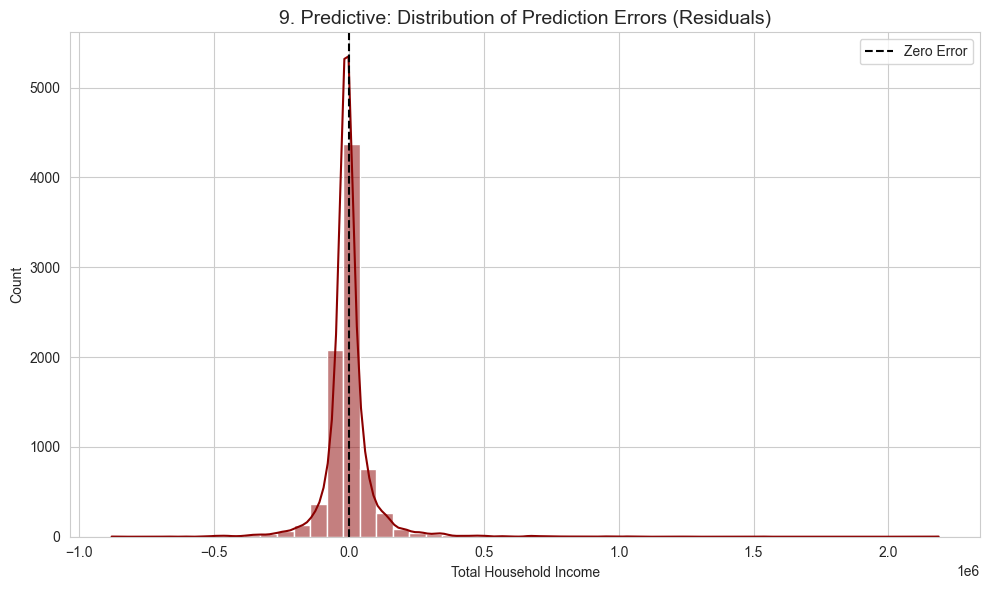

In [84]:
plt.figure(figsize=(10, 6))
ax9 = plt.gca()
sns.histplot(residuals, kde=True, bins=50, color='darkred', ax=ax9)
ax9.axvline(x=0, color='k', linestyle='--', label='Zero Error')
ax9.set_title(f'9. Predictive: Distribution of Prediction Errors (Residuals)', fontsize=14)
ax9.legend()
plt.tight_layout()
plt.show()


##  The error distribution is narrower and more centered around zero compared to the Linear Regression model, indicating smaller overall prediction errors. The improved symmetry suggests the Random Forest model is more robust against the high-income outliers.
<br>

##  10: Numerical Evaluation

In [83]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("--- Numerical Evaluation (Random Forest) ---")
print(f"R^2 Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print("-" * 30)


--- Numerical Evaluation (Random Forest) ---
R^2 Score: 0.8751
Root Mean Squared Error (RMSE): 95,133.51
Mean Absolute Error (MAE): 48,239.31
------------------------------


## The model can explain only part of the variation in household income (R² isn’t very high).The prediction errors (RMSE and MAE) are still relatively large, which means the model isn’t perfect.This suggests that we might need more features beyond expenditure data to better predict household income.